In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
# read raw data
df = pd.read_csv('sleep_mammal.txt', sep='\t')

## Let's see what we have

In [12]:
df.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


## Data description

Includes brain and body weight, life span, gestation time, time sleeping, and predation and danger indices for 62 species of mammals.

_BodyWt_:  body weight (kg)

_BrainWt_: brain weight (g)

_NonDreaming_: slow wave ("nondreaming") sleep (hrs/day)

_Dreaming_: paradoxical ("dreaming") sleep (hrs/day)

_TotalSleep_: total sleep, sum of slow wave and paradoxical sleep (hrs/day)

_LifeSpan_: maximum life span (years)

_Gestation_: gestation time (days)

_Predation_: predation index (1-5)
1 = minimum (least likely to be preyed upon); 5 = maximum (most likely to be preyed upon)

_Exposure_: sleep exposure index (1-5)
1 = least exposed (e.g. animal sleeps in a well-protected den); 5 = most exposed

_Danger_: overall danger index (1-5) (based on the above two indices and other information)
1 = least danger (from other animals); 5 = most danger (from other animals)

## NA values

in a future analysys NA values could be a problem, so let's see if we have NAs at all and if we do, what if we remove data with NAs:

In [11]:
print('Raw data shape: ', df.shape)
print('Drop all NAs: ', df.dropna().shape)

Raw data shape:  (62, 11)
Drop all NAs:  (42, 11)


After NAs removing, we have 20 species less, than before, that's a significant amount since we have just 62 species in total!


What data is missing:

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
Species        62 non-null object
BodyWt         62 non-null float64
BrainWt        62 non-null float64
NonDreaming    48 non-null float64
Dreaming       50 non-null float64
TotalSleep     58 non-null float64
LifeSpan       58 non-null float64
Gestation      58 non-null float64
Predation      62 non-null int64
Exposure       62 non-null int64
Danger         62 non-null int64
dtypes: float64(7), int64(3), object(1)
memory usage: 5.4+ KB


Let's see for which concrete species we don't have total sleep:

In [59]:
print(df.Species[df.TotalSleep.isnull()])

20                 Giraffe
30                Kangaroo
40                   Okapi
61    Yellow-belliedmarmot
Name: Species, dtype: object


In [81]:
# we know from wikipedia that these species sleep these amount of time
df['TotalSleep'][df.Species == 'Giraffe'] = 1.9
df['TotalSleep'][df.Species == 'Kangaroo'] = 8
df['TotalSleep'][df.Species == 'Okapi'] = 0.1
# Have no info here, so let's guess it sleeps for 12 hours:
df['TotalSleep'][df.Species == 'Yellow-belliedmarmot'] = 12

/Users/kiote/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/kiote/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/kiote/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kiote/anaconda/lib/python3.5/site-packages/ipykernel/__ma

### What animals sleep more than 11 hours per day:

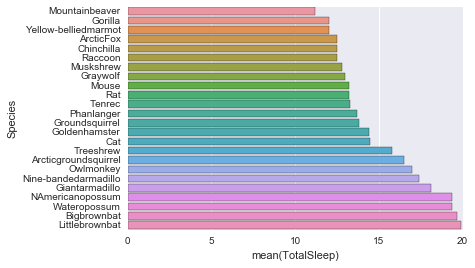

In [135]:
long_sleepers = df[df.TotalSleep > 11]
long_sleepers = long_sleepers.sort_values(by='TotalSleep')
sns.barplot(x=long_sleepers.TotalSleep, y=long_sleepers.Species)

### What animals sleep less than 11 hours per day:

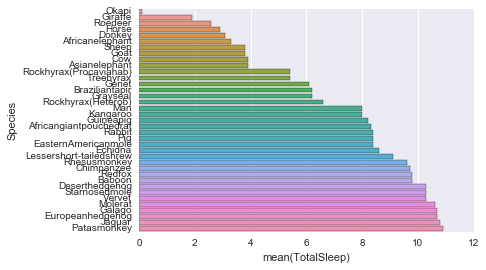

In [136]:
short_sleepers = df[df.TotalSleep < 11]
short_sleepers = short_sleepers.sort_values(by='TotalSleep')
sns.barplot(x=short_sleepers.TotalSleep, y=short_sleepers.Species)

### Let's see the weight of long sleepers:

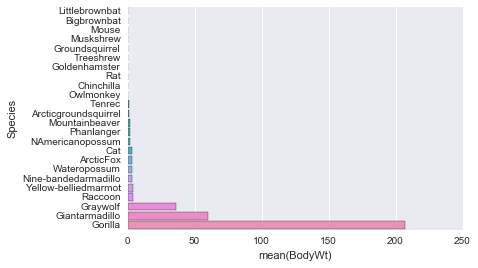

In [130]:
long_sleepers = long_sleepers.sort_values(by='BodyWt')
sns.barplot(x=long_sleepers.BodyWt, y=long_sleepers.Species)

Bit hard to say, what's happening here, so remove "giants":

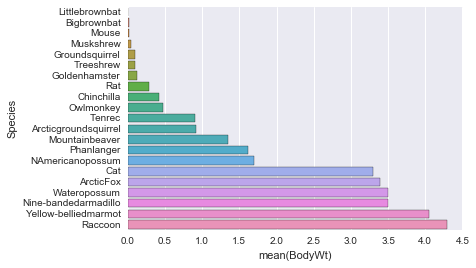

In [131]:
lsw = long_sleepers[long_sleepers.Species != 'Giantarmadillo']
lsw = lsw[lsw.Species != 'Gorilla']
lsw = lsw[lsw.Species != 'Graywolf']
lsw = lsw.sort_values(by='BodyWt')
sns.barplot(x=lsw.BodyWt, y=lsw.Species)

Still no visible connection to weght for long sleepers

### Let's see the same for short sleepers:

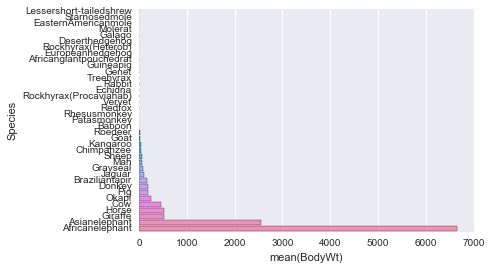

In [132]:
short_sleepers = short_sleepers.sort_values(by='BodyWt')
sns.barplot(x=short_sleepers.BodyWt, y=short_sleepers.Species)

Seems like those 2 kinds of elephant ruins whole picture, so let's remove them from diagram:

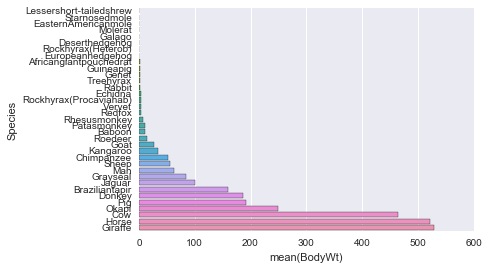

In [133]:
short_sleepers_no_elephants = short_sleepers[short_sleepers.Species != 'Africanelephant']
short_sleepers_no_elephants = short_sleepers_no_elephants[short_sleepers_no_elephants.Species != 'Asianelephant']
sns.barplot(x=short_sleepers_no_elephants.BodyWt, y=short_sleepers_no_elephants.Species)

Still doesn't make lot sence: some of animals weight way more than 100 kg and some way less.

### Weight-based conclusion:

Seems like we have no dependency here.

### Total sleep vs Predation vs Exposure vs Danger

According to this plots we can say, that more danger animal has from outside, less sleep it has. All other dependencies are not so trivial.

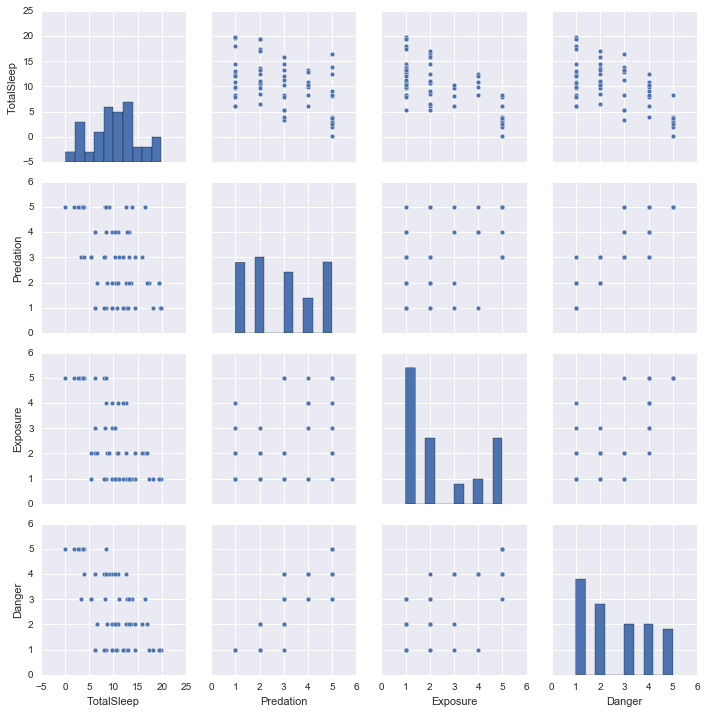

In [145]:
sns.pairplot(df.drop(['BodyWt', 'BrainWt', 'NonDreaming','Dreaming', 'LifeSpan', 'Gestation'], axis=1))

### Fill missed data again to use regression

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
Species        62 non-null object
BodyWt         62 non-null float64
BrainWt        62 non-null float64
NonDreaming    48 non-null float64
Dreaming       50 non-null float64
TotalSleep     62 non-null float64
LifeSpan       58 non-null float64
Gestation      58 non-null float64
Predation      62 non-null int64
Exposure       62 non-null int64
Danger         62 non-null int64
dtypes: float64(7), int64(3), object(1)
memory usage: 5.4+ KB


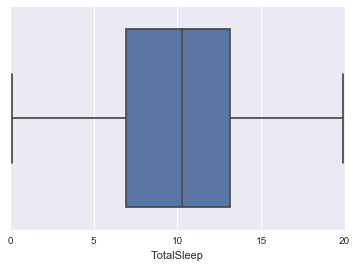

In [181]:
# sns.boxplot(df.NonDreaming)
# sns.boxplot(df.Dreaming)
sns.boxplot(df.TotalSleep)

In [204]:
a = np.array(df.Dreaming.values)
b = np.array(df.NonDreaming.values)

ones = np.ones(a.shape)
a = [ones, a]

x = np.linalg.solve(a, b)
# x    
# a = b*x, where a is dreaming and b = non dreaming
# x = a * 1/b
# a*x0 + b*x1 = 0
# Ax = b

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
ones = np.ones